### Logistic Regression
---

For the *Default* dataset, we model the probability of default.
The probability of default given balance can be written as

$$p\left(balance\right) = Pr\left(default = Yes|balance\right)$$

For __logistic regression__, we model the relation of
$p\left(X\right) = Pr\left(Y = 1|X\right)$ and $X$ using the
*logistic function* so that all the outputs are between 0 and 1.

$$p\left(X\right) = \frac{\exp\left(\beta_{0} + \beta_{1}X\right)}
                         {1 + \exp\left(\beta_{0} + \beta_{1}X\right)}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'Logistic Function')

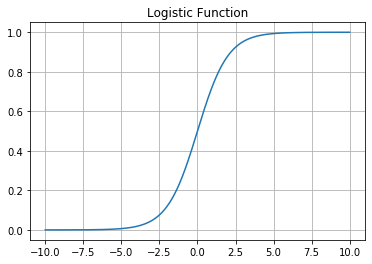

In [2]:
x = np.linspace(-10, 10, 1000)
y = np.exp(x) / (1 + np.exp(x))
plt.plot(x, y)
plt.grid()
plt.title('Logistic Function')

For linear regression,
$$Y = \beta_{0} + \beta_{1}X$$

For logistic regression,
$$\log{\left(\frac{p\left(X\right)}{1 - p\left(X\right)}\right)} = \beta_{0} + \beta_{1}X$$

The LHS is known as *logit* or *log-odds*. We see that the logistic
regression model has a logit that is linear in $X$.
In a linear regression model, $\beta_{1}$ gives the
average change in $Y$ associated with a one-unit increase in $X$. In contrast,
in a logistic regression model, increasing $X$ by one unit changes the *log-odds*
by $\beta_{1}$, or equivalently it multiplies the odds by $\exp{\left(\beta_{1}\right)}$

We use the *maximum likelihood function* to calculate coefficients in logistic regression.

$$\ell\left(\beta_{0}, \beta_{1}\right) = \prod_{i:y_{i}=1}p\left(x_{i}\right)
                                            \prod_{i':y_{i'}=0}\left(1 - p\left(x_{i'}\right)\right)$$

In [1]:
def <- read.csv('../../datasets/Default.csv')
def

default,student,balance,income
<fct>,<fct>,<dbl>,<dbl>
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559
No,No,825.5133,24905.227
No,Yes,808.6675,17600.451
No,No,1161.0579,37468.529


In [2]:
stud <- glm(def$default ~ def$student, family = binomial)
coef(stud)

(Intercept) def$studentYes 
    -3.5041278      0.4048871

In [3]:
stud.mul <- glm(def$default ~ ., family = binomial, data = def)
coef(stud.mul)

(Intercept)    studentYes       balance        income 
-1.086905e+01 -6.467758e-01  5.736505e-03  3.033450e-06

In [4]:
summary(stud)


Call:
glm(formula = def$default ~ def$student, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2970  -0.2970  -0.2434  -0.2434   2.6585  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.50413    0.07071  -49.55  < 2e-16 ***
def$studentYes  0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


In [5]:
summary(stud.mul)


Call:
glm(formula = def$default ~ ., family = binomial, data = def)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


In [6]:
cor(def[c(-1, -2)])

,balance,income
balance,1.0000000,-0.1522434
income,-0.1522434,1.0000000


Here, the coefficient of student variable is negative in multiple regression,
indicating that students are less likely to default than non-students.
In contrast, the coefficient is positive in single regression.
The negative coefficient of student in multiple logistic regression indicates
that *for a fixed value of balance and income, a student is less likely to default than a non-student*.
Consequently, there is a positive coefficient for student in the single variable logistic regression
which indicates that students tend to hold higher levels of debt, which is in turn associated
with higher probability of default. In other words, students are more likely to have large
credit card balances, which is associated with high default rates.

Thus, even though
an individual student with a given credit card balance will tend to have a
lower probability of default than a non-student with the same credit card
balance, the fact that students on the whole tend to have higher credit card
balances means that overall, students tend to default at a higher rate than
non-students. This is an important distinction for a credit card company
that is trying to determine to whom they should offer credit. A student is
riskier than a non-student if no information about the student’s credit card
balance is available. However, that student is less risky than a non-student
with the same credit card balance!

This phenomenon is called *confounding*.

Why do we need another method, when we have logistic regression?
There are several reasons:
- When the classes are well-separated, the parameter estimates for the logistic regression model are surprisingly unstable. Linear discriminant analysis does not suffer from this problem.
- If n is small and the distribution of the predictors X is approximately normal in each of the classes, the linear discriminant model is again more stable than the logistic regression model.

### Linear Discriminant Analysis
---

*Bayes' theorem*:

$$p_{k}\left(x\right) = Pr\left(Y = k|X = x\right) = \frac{\pi_{k}f_{k}\left(x\right)}
                                    {\sum_{l=1}^{K}\pi_{l}f_{l}\left(x\right)}$$
                                    
where $f$ denotes the *density function* of $X$ and $p$ is known as *posterior probability*

Suppose we assume *Gaussian* distribution. The density function for $p = 1$ is

$$f_{k}\left(x\right) = \frac{1}{\sqrt{2\pi}\sigma_{k}}
    \exp\left(-\frac{1}{2\sigma_{k}^{2}}\left(x - \mu_{k}^{2}\right)\right)$$

We classify the predictor into class with gives largest logit with *discriminant function* as

$$\delta_{k}\left(x\right) = x\cdot\frac{\mu_{k}}{\sigma^{2}} - \frac{\mu_{k}^{2}}{2\sigma^{2}} + \log{\left(\pi_{k}\right)}$$

Here,

$$\hat{\mu}_{k} = \frac{1}{n_{k}}\sum_{i:y_{i}=k}x_{i}$$

$$\hat{\sigma}^{2} = \frac{1}{n - K}\sum_{k=1}^{K}\sum_{i:y_{i}=k}\left(x_{i} - \hat{\mu}_{k}\right)^{2}$$

where $n$ is the total number of training observations, and $n_{k}$ is the number
of training observations in the kth class. The estimate for $\mu_{k}$ is simply the
average of all the training observations from the kth class, while $\sigma^{2}$ can
be seen as a weighted average of the sample variances for each of the $K$ classes.

For $p > 1$, we use multivariate Gaussian distribution as 

$$f\left(x\right) = \frac{1}{\left(2\pi\right)^{p/2}|\Sigma|^{1/2}}
    \exp{\left(-\frac{1}{2}\left(x - \mu\right)^{T}\Sigma^{-1}\left(x - \mu\right)\right)}$$

$$\delta_{k}\left(x\right) = x^{T}\Sigma^{-1}\mu_{k} - \frac{1}{2}\mu_{k}^{T}\Sigma^{-1}\mu_{k} + \log{\pi_{k}}$$

We go about in LDA by estimating $\mu$, $\pi$ and $\Sigma$ and then plugging them in discriminant function $\delta$ to get classification predictions. The reason *linear* word is used is relation of $\delta(x)$ and $x$ are related by a linear function.

**When the true decision boundaries are linear, then
the LDA and logistic regression approaches will tend to perform well. When
the boundaries are moderately non-linear, QDA may give better results.
Finally, for much more complicated decision boundaries, a non-parametric
approach such as KNN can be superior. But the level of smoothness for a
non-parametric approach must be chosen carefully.**

In [7]:
library(MASS)
?lda

lda {MASS},R Documentation
formula,"A formula of the form groups ~ x1 + x2 + ... That is, the response is the grouping factor and the right hand side specifies the (non-factor) discriminators."
data,Data frame from which variables specified in formula are preferentially to be taken.
x,(required if no formula is given as the principal argument.) a matrix or data frame or Matrix containing the explanatory variables.
grouping,(required if no formula principal argument is given.) a factor specifying the class for each observation.
prior,"the prior probabilities of class membership. If unspecified, the class proportions for the training set are used. If present, the probabilities should be specified in the order of the factor levels."
tol,A tolerance to decide if a matrix is singular; it will reject variables and linear combinations of unit-variance variables whose variance is less than tol^2.
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
method,"""moment"" for standard estimators of the mean and variance, ""mle"" for MLEs, ""mve"" to use cov.mve, or ""t"" for robust estimates based on a t distribution."
CV,"If true, returns results (classes and posterior probabilities) for leave-one-out cross-validation. Note that if the prior is estimated, the proportions in the whole dataset are used."


In [8]:
?qda

qda {MASS},R Documentation
formula,"A formula of the form groups ~ x1 + x2 + ... That is, the response is the grouping factor and the right hand side specifies the (non-factor) discriminators."
data,Data frame from which variables specified in formula are preferentially to be taken.
x,(required if no formula is given as the principal argument.) a matrix or data frame or Matrix containing the explanatory variables.
grouping,(required if no formula principal argument is given.) a factor specifying the class for each observation.
prior,"the prior probabilities of class membership. If unspecified, the class proportions for the training set are used. If specified, the probabilities should be specified in the order of the factor levels."
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
method,"""moment"" for standard estimators of the mean and variance, ""mle"" for MLEs, ""mve"" to use cov.mve, or ""t"" for robust estimates based on a t distribution."
CV,"If true, returns results (classes and posterior probabilities) for leave-out-out cross-validation. Note that if the prior is estimated, the proportions in the whole dataset are used."
nu,"degrees of freedom for method = ""t""."


In [9]:
?glm

glm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
family,"a description of the error distribution and link function to be used in the model. For glm this can be a character string naming a family function, a family function or the result of a call to a family function. For glm.fit only the third option is supported. (See family for details of family functions.)"
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which glm is called."
weights,an optional vector of ‘prior weights’ to be used in the fitting process. Should be NULL or a numeric vector.
subset,an optional vector specifying a subset of observations to be used in the fitting process.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
start,starting values for the parameters in the linear predictor.
etastart,starting values for the linear predictor.
mustart,starting values for the vector of means.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector of length equal to the number of cases. One or more offset terms can be included in the formula instead or as well, and if more than one is specified their sum is used. See model.offset."


In [10]:
library(class)
?knn

knn {class},R Documentation
train,matrix or data frame of training set cases.
test,matrix or data frame of test set cases. A vector will be interpreted as a row vector for a single case.
cl,factor of true classifications of training set
k,number of neighbours considered.
l,"minimum vote for definite decision, otherwise doubt. (More precisely, less than k-l dissenting votes are allowed, even if k is increased by ties.)"
prob,"If this is true, the proportion of the votes for the winning class are returned as attribute prob."
use.all,"controls handling of ties. If true, all distances equal to the kth largest are included. If false, a random selection of distances equal to the kth is chosen to use exactly k neighbours."
